In [1]:
import pandas as pd
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Sentiment Analysis with VADER

Discuss VADER

In [2]:
#import nltk
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

### Behind the scenes: Lexicon

In [3]:
sid.lexicon[":("]

-1.9

In [4]:
sid.lexicon[":)"]

2.0

#### Modifiers

In [5]:
sid.polarity_scores("good")

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}

In [6]:
[sid.polarity_scores(text) for text in ["good", "good!", "good!!", "good!!!"]]

[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404},
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4926},
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5399},
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5826}]

In [7]:
sid.polarity_scores("kind of good")

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [8]:
sid.polarity_scores("not good")

{'neg': 0.706, 'neu': 0.294, 'pos': 0.0, 'compound': -0.3412}

### Example: Reddit books data

In [9]:
df = pd.read_csv("reddit_books.csv", encoding='utf-8')
df.sample(3)

,id,author,created,title,content,subreddit,url,num_comments,score,upvote_ratio,comments,comments_text,comment_blob
71,1aobgaa,Hopeful-Gear-4653,2024-02-11 16:09:57+00:00,Finally falling in love with reading & book co...,I’ve been someone who’s loved art and media my...,books,https://www.reddit.com/r/books/comments/1aobga...,15,79,0.88,<praw.models.comment_forest.CommentForest obje...,"['Welcome aboard', 'I was just talking to my f...",Welcome aboard | I was just talking to my frie...
26,1ap6o85,brooke_157,2024-02-12 18:15:20+00:00,What book has genuinely left you gut-wrenching...,"I just finished The Women by Kristin Hannah, a...",books,https://www.reddit.com/r/books/comments/1ap6o8...,1193,839,0.94,<praw.models.comment_forest.CommentForest obje...,"[""When I was in the depths of depression, The ...","When I was in the depths of depression, The Be..."
70,1ao3ov2,96Flex96,2024-02-11 08:54:34+00:00,Have books ever ruined reality for you?,"\nHave you ever read a book, or a series of bo...",books,https://www.reddit.com/r/books/comments/1ao3ov...,199,308,0.86,<praw.models.comment_forest.CommentForest obje...,['Yes. Reading Brontë and Austen as a teenager...,Yes. Reading Brontë and Austen as a teenager g...


In [10]:
def vader_scores(text):
    try:
        return sid.polarity_scores(text)
    except:
        return dict()

comments_vader = df.comment_blob.apply(vader_scores).apply(pd.Series).add_prefix("comm_")
post_vader = df.content.apply(vader_scores).apply(pd.Series).add_prefix("post_")
scores = pd.concat([df, post_vader,comments_vader], axis = 1)

In [11]:
scores.sample(5)

,id,author,created,title,content,subreddit,url,num_comments,score,upvote_ratio,...,comments_text,comment_blob,post_neg,post_neu,post_pos,post_compound,comm_neg,comm_neu,comm_pos,comm_compound
7,1aq0bjn,Late-Assumption8840,2024-02-13 18:16:33+00:00,I'm in love...,... With Octavia Butler! \nPicked up Parables ...,books,https://www.reddit.com/r/books/comments/1aq0bj...,42,284,0.93,...,['Octavia Butler is an author I really want to...,Octavia Butler is an author I really want to g...,0.049,0.836,0.115,0.8718,0.081,0.744,0.175,0.9996
65,1ao93x1,I_Fuck_Whales,2024-02-11 14:26:00+00:00,Stoner - John Williams. What makes this so good?,I just finished reading Stoner (for the second...,books,https://www.reddit.com/r/books/comments/1ao93x...,74,217,0.92,...,"[""It quietly blows you away. Focusing on one m...",It quietly blows you away. Focusing on one man...,0.038,0.827,0.135,0.9640,0.091,0.695,0.215,0.9999
67,1aoanni,Inside-Cicada-7439,2024-02-11 15:35:56+00:00,Was anyone else left reeling by My Dark Vanessa?,"first, I just want to say wow. That was an inc...",books,https://www.reddit.com/r/books/comments/1aoann...,58,155,0.87,...,"[""I read this book at the start of the year an...",I read this book at the start of the year and ...,0.102,0.686,0.212,0.9928,0.110,0.707,0.183,0.9998
33,1aqfogq,sposeitwas2swallows,2024-02-14 05:48:12+00:00,Just closed the final pages in ‘The Alchemist’...,This felt like an important time to finally fi...,books,https://www.reddit.com/r/books/comments/1aqfog...,1,0,0.43,...,"[""Also:\n\nCarpe diem! \nLive Laugh Love! \...",Also:\n\nCarpe diem! \nLive Laugh Love! \nD...,0.041,0.800,0.159,0.9914,0.172,0.463,0.365,0.7633
37,1apqxkj,KaldomEX,2024-02-13 11:06:30+00:00,"The boy at the top of the mountain, from John ...","Hello, I am Japanese.\nWhen I first read this ...",books,https://www.reddit.com/r/books/comments/1apqxk...,3,7,0.89,...,"['Hajimemashite! \n\nI haven\'t read the book,...","Hajimemashite! \n\nI haven't read the book, or...",0.043,0.827,0.131,0.8606,0.127,0.721,0.151,0.9467


In [12]:
scores.sort_values("post_pos", ascending=False, ignore_index=True).content[0]

'Im currently reading Gormenghast trilogy, and i feel warm, i feel interested, devoted to book, it feels soft, yet punchy when it desires to, and leaves with no choice but to think. It awakes certain sense of caring for the characters, where everything that Peake wrote fights against simple knowing what will happen, but living in the moment with characters and daring to think what will be. Peake-s writing is something special and truly a gem, he literally writes as he paints a painting, sweet and sour :) Interesting thing is last book i read before starting Gormenghast was Clockwork Orange, Anthony Burgess and Michael Moorcock (aside from Elric, Hawkmoon would be my favorite ever) were pretty vocal of Gormenghast and Peake as an outstanding work of pure lovely genious, and writing that screams word amazement. Well i guess this is appreciation post :) Cheers Gormenghasters!'

In [13]:
scores.sort_values("post_neg", ascending=False, ignore_index=True).content[0]

'I just finished The Women by Kristin Hannah, and for some reason it left me reeling. I’m still trying to figure out exactly what the triggers were for me but I cried and cried and cried. I couldn’t sleep, I’ve been so distracted reliving certain moments and feeling the pain all over again. I can physically feel the pain in my body. I do tear up with books now and then but was so surprised at the response this one got out of me. I hope I recover in a week or two haha. \n\nWhat books have you read that have broken your heart and torn you apart? Was it surprising for you? What are your big emotional triggers in books?'

In [14]:
scores.sort_values("post_neu", ascending=False, ignore_index=True).content[0]

"Hello readers!\n\nEvery Monday, we will post a calendar with the date and topic of that week's threads and we will update it to include links as those threads go live.  All times are Eastern US.\n\n---\n\nDay|Date|Time(ET)|Topic|\n-|-|-|-\n^Monday|^(February 12)||[^(What are you Reading?)](https://redd.it/1aoxg9o)\n^Tuesday|^(February 13)||[^(Simple Questions)](https://redd.it/1appyam)\n^Wednesday|^(February 14)||^(LOTW)\n^Thursday|^(February 15)||^(Favorite Books)\n^Friday|^(February 16)||^(Weekly Recommendation Thread)\n^Saturday|^(February 17)||^(Simple Questions)\n^Sunday|^(February 18)||^(Weekly FAQ: What do you use as a bookmark?)"

<Axes: xlabel='post_pos', ylabel='comm_pos'>

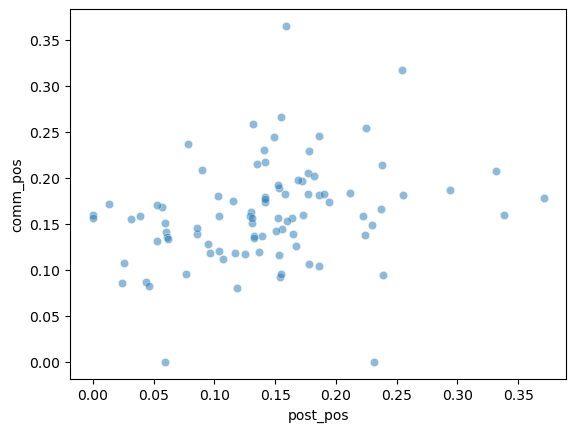

In [15]:
sns.scatterplot(data = scores, x="post_pos", y = "comm_pos", alpha = 0.5)

<Axes: xlabel='post_neu', ylabel='num_comments'>

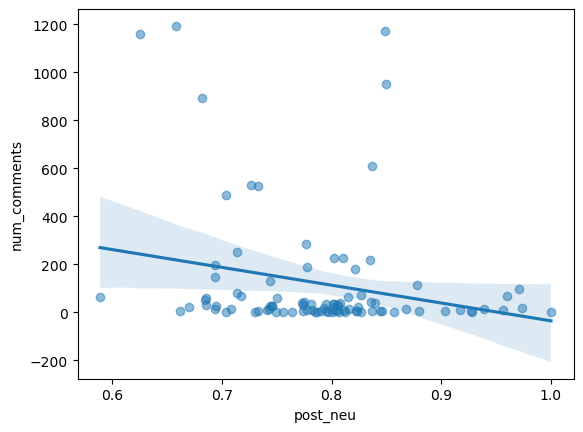

In [16]:
sns.regplot(data = scores, x="post_neu", y = "num_comments", scatter_kws = {"alpha":0.5})

<Axes: xlabel='post_neu', ylabel='upvote_ratio'>

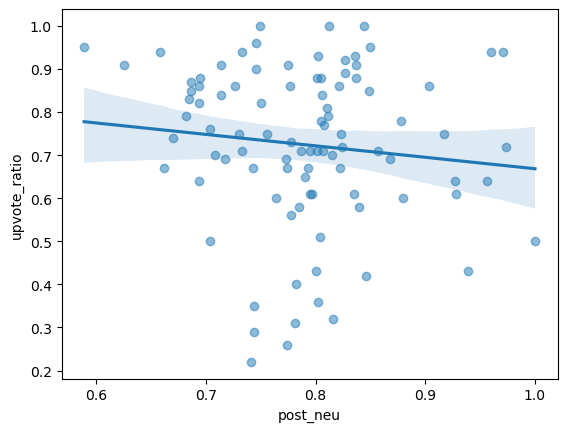

In [17]:
sns.regplot(data = scores, x="post_neu", y = "upvote_ratio", scatter_kws = {"alpha":0.5})

<Axes: xlabel='post_pos', ylabel='comm_pos'>

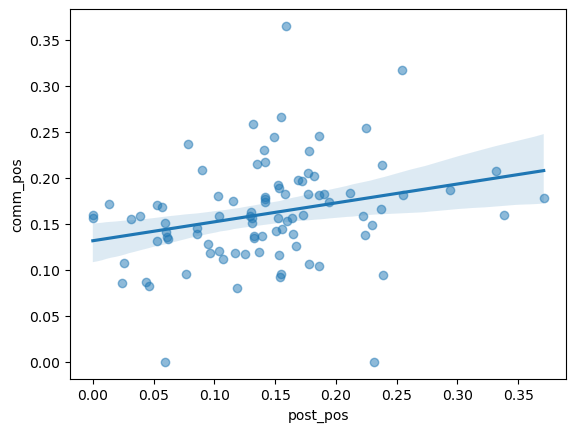

In [18]:
sns.regplot(data = scores, x="post_pos", y = "comm_pos", scatter_kws = {"alpha":0.5})

KeyError: "['neu'] not in index"

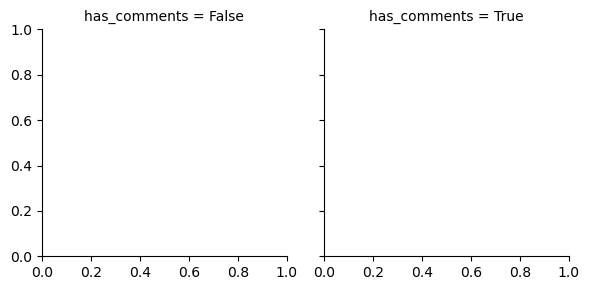

In [19]:
scores["has_comments"] = scores.num_comments>0
grid = sns.FacetGrid(scores, col = "has_comments")
grid.map(sns.regplot, "neu", "upvote_ratio", scatter_kws = {"alpha":0.5})

## Topic Modeling

Basic topics
Adjusting k
Custom stop words
Correlation between topics, relating topics to reddit data

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import ast
df["comments_list"] = df.comments_text.apply(ast.literal_eval)
exploded = df[["comments_list"]].explode("comments_list", ignore_index=True)
exploded["type"] = "comment"
exploded.rename(columns = {"comments_list":"text"}, inplace=True)
posts_df = df[["content"]].copy()
posts_df["type"] = "post"
posts_df.rename(columns = {"content":"text"}, inplace=True)
main = pd.concat([posts_df, exploded], axis = 0).reset_index()
main = main.loc[main.text.notnull(),:]

In [ ]:
main.text

0       Hi everyone!\n\nWhat are you reading? What hav...
1       i mirëpritur readers, \n\nThis is our weekly d...
3       For context, I am a 23 year old woman who was ...
4       Dear fellow readers,\n\nI am regular  9 to 5 p...
6       I read this book as a tween, and just now I wa...
                              ...                        
8753    I guess we have different attitudes about life...
8754    Media mail is United States Postal Service for...
8755    Yep i get it also there are other sites with b...
8756    US libraries (usually) have late fees, and if ...
8757    The “terrible experience” was them repeatedly ...
Name: text, Length: 8749, dtype: object